In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal
import statistics

GenFR2017 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20170101-20171231.csv")

GenFR2017 = GenFR2017.replace('n/e', np.NaN)
GenFR2017 = GenFR2017.replace('N/A', np.NaN)

GenFR2017.iloc[:,11:13] = GenFR2017.iloc[:,11:13].replace(np.NaN, 0)

GenFR2017 = pd.DataFrame({'Date': GenFR2017.iloc[:,1],
                          'Nuclear [MWh]': GenFR2017.iloc[:,16],
                          'Biomass [MWh]': GenFR2017.iloc[:,2] + GenFR2017.iloc[:,20],
                          'Gas [MWh]': GenFR2017.iloc[:,5],
                          'Coal [MWh]': GenFR2017.iloc[:,6],
                          'Oil [MWh]': GenFR2017.iloc[:,7],
                          'PSH [MWh]': GenFR2017.iloc[:,11] - GenFR2017.iloc[:,12],
                          'Hydro [MWh]': GenFR2017.iloc[:,13] + GenFR2017.iloc[:,14],
                          'Solar [MWh]': GenFR2017.iloc[:,19],
                          'Wind [MWh]': GenFR2017.iloc[:,22]})

for i in range(1,10):
    GenFR2017.iloc[2091,i] = np.nanmean(GenFR2017.iloc[2090:2093,i]).round(1)

print(GenFR2017.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2017 00:00 - 01.01.2017 01:00 (CET/CEST)        53322.0          557.0     7395.0      1456.0      220.0      464.0       6346.0          0.0       604.0
1     01.01.2017 01:00 - 01.01.2017 02:00 (CET/CEST)        53290.0          559.0     7298.0      1039.0      232.0      284.0       5386.0          0.0       633.0
2     01.01.2017 02:00 - 01.01.2017 03:00 (CET/CEST)        53132.0          559.0     6935.0      1052.0      232.0     -588.0       5177.0          0.0       627.0
3     01.01.2017 03:00 - 01.01.2017 04:00 (CET/CEST)        52982.0          559.0     6191.0      1005.0      232.0    -1165.0       5102.0          0.0       609.0
4     01.01.2017 04:00 - 01.01.2017 05:00 (CET/CEST)        53086.0          559.0     5961.0      1018.0      232.0    -1347.0       4456.0          0.0       637.0
5   

In [3]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2017.iloc[:,0])):
        if i < 84:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2017.iloc[start,0]
            opNu = sum(GenFR2017.iloc[start:end,1])
            opBi = sum(GenFR2017.iloc[start:end,2])
            opGa = sum(GenFR2017.iloc[start:end,3])
            opCo = sum(GenFR2017.iloc[start:end,4])
            opOi = sum(GenFR2017.iloc[start:end,5])
            opPS = sum(GenFR2017.iloc[start:end,6])
            opHy = sum(GenFR2017.iloc[start:end,7])
            opSo = sum(GenFR2017.iloc[start:end,8])
            opWi = sum(GenFR2017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 84: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2018
            end = 2040
            day = GenFR2017.iloc[start,0]
            opNu = sum(GenFR2017.iloc[start:skip,1]) + sum(GenFR2017.iloc[(skip+1):end,1])
            opBi = sum(GenFR2017.iloc[start:skip,2]) + sum(GenFR2017.iloc[(skip+1):end,2])
            opGa = sum(GenFR2017.iloc[start:skip,3]) + sum(GenFR2017.iloc[(skip+1):end,3])
            opCo = sum(GenFR2017.iloc[start:skip,4]) + sum(GenFR2017.iloc[(skip+1):end,4])
            opOi = sum(GenFR2017.iloc[start:skip,5]) + sum(GenFR2017.iloc[(skip+1):end,5])
            opPS = sum(GenFR2017.iloc[start:skip,6]) + sum(GenFR2017.iloc[(skip+1):end,6])
            opHy = sum(GenFR2017.iloc[start:skip,7]) + sum(GenFR2017.iloc[(skip+1):end,7])
            opSo = sum(GenFR2017.iloc[start:skip,8]) + sum(GenFR2017.iloc[(skip+1):end,8])
            opWi = sum(GenFR2017.iloc[start:skip,9]) + sum(GenFR2017.iloc[(skip+1):end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 85 <= i < 301:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2017.iloc[start,0]
            opNu = sum(GenFR2017.iloc[start:end,1])
            opBi = sum(GenFR2017.iloc[start:end,2])
            opGa = sum(GenFR2017.iloc[start:end,3])
            opCo = sum(GenFR2017.iloc[start:end,4])
            opOi = sum(GenFR2017.iloc[start:end,5])
            opPS = sum(GenFR2017.iloc[start:end,6])
            opHy = sum(GenFR2017.iloc[start:end,7])
            opSo = sum(GenFR2017.iloc[start:end,8])
            opWi = sum(GenFR2017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 301:
            start = 24*i
            end = 7249
            day = GenFR2017.iloc[start,0]
            opNu = sum(GenFR2017.iloc[start:end,1])
            opBi = sum(GenFR2017.iloc[start:end,2])
            opGa = sum(GenFR2017.iloc[start:end,3])
            opCo = sum(GenFR2017.iloc[start:end,4])
            opOi = sum(GenFR2017.iloc[start:end,5])
            opPS = sum(GenFR2017.iloc[start:end,6])
            opHy = sum(GenFR2017.iloc[start:end,7])
            opSo = sum(GenFR2017.iloc[start:end,8])
            opWi = sum(GenFR2017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 302 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2017.iloc[start,0]
            opNu = sum(GenFR2017.iloc[start:end,1])
            opBi = sum(GenFR2017.iloc[start:end,2])
            opGa = sum(GenFR2017.iloc[start:end,3])
            opCo = sum(GenFR2017.iloc[start:end,4])
            opOi = sum(GenFR2017.iloc[start:end,5])
            opPS = sum(GenFR2017.iloc[start:end,6])
            opHy = sum(GenFR2017.iloc[start:end,7])
            opSo = sum(GenFR2017.iloc[start:end,8])
            opWi = sum(GenFR2017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

FRGen2017 = function().round(2)
FRGen2017["Day"] = pd.date_range(start="1/1/2017", periods=365, freq="D")
print(FRGen2017.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2017-01-01      1261064.0        13422.0   157103.0     25113.0     5551.0   -19017.0     131116.0       8524.0     19675.0
1   2017-01-02      1260786.0        13370.0   192988.0     43965.0     5521.0    -2052.0     141633.0       7848.0     19516.0
2   2017-01-03      1267776.0        13484.0   209431.0     47174.0    27331.0    11290.0     165452.0      12123.0     34339.0
3   2017-01-04      1271916.0        13804.0   211683.0     52707.0    21183.0    12093.0     179250.0      11098.0     69706.0
4   2017-01-05      1271940.0        13832.0   206760.0     53333.0    16884.0     3427.0     170932.0      12038.0     47613.0
5   2017-01-06      1286477.0        13926.0   206035.0     53226.0    20860.0     6655.0     166441.0      15086.0     37314.0
6   2017-01-07      1286811.0        13951.0   184522.0     53106.0    10250.0     4767.0     147280.0  

In [4]:
GenFR2018 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20180101-20181231.csv")

GenFR2018 = GenFR2018.replace('n/e', np.NaN)
GenFR2018 = GenFR2018.replace('N/A', np.NaN)

GenFR2018.iloc[:,11:13] = GenFR2018.iloc[:,11:13].replace(np.NaN, 0)

GenFR2018 = pd.DataFrame({'Date': GenFR2018.iloc[:,1],
                          'Nuclear [MWh]': GenFR2018.iloc[:,16],
                          'Biomass [MWh]': GenFR2018.iloc[:,2] + GenFR2018.iloc[:,20],
                          'Gas [MWh]': GenFR2018.iloc[:,5],
                          'Coal [MWh]': GenFR2018.iloc[:,6],
                          'Oil [MWh]': GenFR2018.iloc[:,7],
                          'PSH [MWh]': GenFR2018.iloc[:,11] - GenFR2018.iloc[:,12],
                          'Hydro [MWh]': GenFR2018.iloc[:,13] + GenFR2018.iloc[:,14],
                          'Solar [MWh]': GenFR2018.iloc[:,19],
                          'Wind [MWh]': GenFR2018.iloc[:,22]})

for i in range(1,10):
    GenFR2018.iloc[2025,i] = np.nanmean(GenFR2018.iloc[2024:2027,i]).round(1)
    GenFR2018.iloc[8334:8336,i] = np.nanmean(GenFR2018.iloc[8333:8337,i]).round(1)

print(GenFR2018.to_string())

C:\Users\anton_zpf58tt\AppData\Local\Temp\ipykernel_3340\2516484870.py:21: RuntimeWarning: Mean of empty slice
  GenFR2018.iloc[8334:8336,i] = np.nanmean(GenFR2018.iloc[8333:8337,i]).round(1)


                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2018 00:00 - 01.01.2018 01:00 (CET/CEST)        37183.0          554.0     2305.0        11.0      209.0    -1105.0       8076.0          0.0      9808.0
1     01.01.2018 01:00 - 01.01.2018 02:00 (CET/CEST)        34793.0          550.0     2316.0        11.0      214.0    -1343.0       7946.0          0.0      9707.0
2     01.01.2018 02:00 - 01.01.2018 03:00 (CET/CEST)        34263.0          549.0     2286.0        11.0      215.0    -1394.0       7164.0          0.0      9502.0
3     01.01.2018 03:00 - 01.01.2018 04:00 (CET/CEST)        34081.0          546.0     2290.0        11.0      214.0    -1344.0       6826.0          0.0      9288.0
4     01.01.2018 04:00 - 01.01.2018 05:00 (CET/CEST)        34103.0          546.0     2291.0        10.0      215.0    -1840.0       5966.0          0.0      9005.0
5   

In [5]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2018.iloc[:,0])):
        if i < 83:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2018.iloc[start,0]
            opNu = sum(GenFR2018.iloc[start:end,1])
            opBi = sum(GenFR2018.iloc[start:end,2])
            opGa = sum(GenFR2018.iloc[start:end,3])
            opCo = sum(GenFR2018.iloc[start:end,4])
            opOi = sum(GenFR2018.iloc[start:end,5])
            opPS = sum(GenFR2018.iloc[start:end,6])
            opHy = sum(GenFR2018.iloc[start:end,7])
            opSo = sum(GenFR2018.iloc[start:end,8])
            opWi = sum(GenFR2018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 83: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 1994
            end = 2016
            day = GenFR2018.iloc[start,0]
            opNu = sum(GenFR2018.iloc[start:skip,1]) + sum(GenFR2018.iloc[skip+1:end,1])
            opBi = sum(GenFR2018.iloc[start:skip,2]) + sum(GenFR2018.iloc[skip+1:end,2])
            opGa = sum(GenFR2018.iloc[start:skip,3]) + sum(GenFR2018.iloc[skip+1:end,3])
            opCo = sum(GenFR2018.iloc[start:skip,4]) + sum(GenFR2018.iloc[skip+1:end,4])
            opOi = sum(GenFR2018.iloc[start:skip,5]) + sum(GenFR2018.iloc[skip+1:end,5])
            opPS = sum(GenFR2018.iloc[start:skip,6]) + sum(GenFR2018.iloc[skip+1:end,6])
            opHy = sum(GenFR2018.iloc[start:skip,7]) + sum(GenFR2018.iloc[skip+1:end,7])
            opSo = sum(GenFR2018.iloc[start:skip,8]) + sum(GenFR2018.iloc[skip+1:end,8])
            opWi = sum(GenFR2018.iloc[start:skip,9]) + sum(GenFR2018.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 84 <= i < 300:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2018.iloc[start,0]
            opNu = sum(GenFR2018.iloc[start:end,1])
            opBi = sum(GenFR2018.iloc[start:end,2])
            opGa = sum(GenFR2018.iloc[start:end,3])
            opCo = sum(GenFR2018.iloc[start:end,4])
            opOi = sum(GenFR2018.iloc[start:end,5])
            opPS = sum(GenFR2018.iloc[start:end,6])
            opHy = sum(GenFR2018.iloc[start:end,7])
            opSo = sum(GenFR2018.iloc[start:end,8])
            opWi = sum(GenFR2018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 300:
            start = 24*i
            skip = 7202
            end = 7225
            day = GenFR2018.iloc[start,0]
            opNu = sum(GenFR2018.iloc[start:skip,1]) + sum(GenFR2018.iloc[skip+1:end,1])
            opBi = sum(GenFR2018.iloc[start:skip,2]) + sum(GenFR2018.iloc[skip+1:end,2])
            opGa = sum(GenFR2018.iloc[start:skip,3]) + sum(GenFR2018.iloc[skip+1:end,3])
            opCo = sum(GenFR2018.iloc[start:skip,4]) + sum(GenFR2018.iloc[skip+1:end,4])
            opOi = sum(GenFR2018.iloc[start:skip,5]) + sum(GenFR2018.iloc[skip+1:end,5])
            opPS = sum(GenFR2018.iloc[start:skip,6]) + sum(GenFR2018.iloc[skip+1:end,6])
            opHy = sum(GenFR2018.iloc[start:skip,7]) + sum(GenFR2018.iloc[skip+1:end,7])
            opSo = sum(GenFR2018.iloc[start:skip,8]) + sum(GenFR2018.iloc[skip+1:end,8])
            opWi = sum(GenFR2018.iloc[start:skip,9]) + sum(GenFR2018.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 301 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2018.iloc[start,0]
            opNu = sum(GenFR2018.iloc[start:end,1])
            opBi = sum(GenFR2018.iloc[start:end,2])
            opGa = sum(GenFR2018.iloc[start:end,3])
            opCo = sum(GenFR2018.iloc[start:end,4])
            opOi = sum(GenFR2018.iloc[start:end,5])
            opPS = sum(GenFR2018.iloc[start:end,6])
            opHy = sum(GenFR2018.iloc[start:end,7])
            opSo = sum(GenFR2018.iloc[start:end,8])
            opWi = sum(GenFR2018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

FRGen2018 = function().round(2)
FRGen2018["Day"] = pd.date_range(start="1/1/2018", periods=365, freq="D")
print(FRGen2018.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2018-01-01       931190.0        13051.0    56926.0       220.0     5151.0   -34306.0     175593.0       8168.0    214525.0
1   2018-01-02      1243491.0        13074.0    71872.0       249.0     5149.0     1770.0     187840.0       6718.0    156592.0
2   2018-01-03      1249867.0        12845.0    58955.0       232.0     5180.0   -17268.0     195582.0       7144.0    218612.0
3   2018-01-04      1260454.0        13172.0    59987.0       239.0     5229.0    -8292.0     206398.0       7375.0    197314.0
4   2018-01-05      1281614.0        12893.0    72937.0       223.0     5205.0     2721.0     201383.0       9203.0    112749.0
5   2018-01-06      1321963.0        13078.0    60561.0         NaN     5189.0    -1969.0     190395.0       6222.0     45241.0
6   2018-01-07      1238630.0        13061.0    57915.0         NaN     4751.0   -36483.0     183107.0  

In [6]:
GenFR2019 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20190101-20191231.csv")

GenFR2019 = GenFR2019.replace('n/e', np.NaN)
GenFR2019 = GenFR2019.replace('N/A', np.NaN)

GenFR2019.iloc[:,11:13] = GenFR2019.iloc[:,11:13].replace(np.NaN, 0)

GenFR2019 = pd.DataFrame({'Date': GenFR2019.iloc[:,1],
                          'Nuclear [MWh]': GenFR2019.iloc[:,16],
                          'Biomass [MWh]': GenFR2019.iloc[:,2] + GenFR2019.iloc[:,20],
                          'Gas [MWh]': GenFR2019.iloc[:,5],
                          'Coal [MWh]': GenFR2019.iloc[:,6],
                          'Oil [MWh]': GenFR2019.iloc[:,7],
                          'PSH [MWh]': GenFR2019.iloc[:,11] - GenFR2019.iloc[:,12],
                          'Hydro [MWh]': GenFR2019.iloc[:,13] + GenFR2019.iloc[:,14],
                          'Solar [MWh]': GenFR2019.iloc[:,19],
                          'Wind [MWh]': GenFR2019.iloc[:,22]})

for i in range(1,10):
    GenFR2019.iloc[2507:2509,i] = np.nanmean(GenFR2019.iloc[2506:2510,i]).round(1)
    GenFR2019.iloc[4922:4927,i] = np.nanmean(GenFR2019.iloc[4921:4928,i]).round(1)

print(GenFR2019.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2019 00:00 - 01.01.2019 01:00 (CET/CEST)        55627.0          604.0     2722.0         0.0      207.0    -1377.0       4606.0          0.0      1622.0
1     01.01.2019 01:00 - 01.01.2019 02:00 (CET/CEST)        55113.0          604.0     2526.0         NaN      215.0    -1536.0       4084.0          0.0      1637.0
2     01.01.2019 02:00 - 01.01.2019 03:00 (CET/CEST)        54780.0          605.0     2425.0         NaN      214.0    -2372.0       3665.0          0.0      1567.0
3     01.01.2019 03:00 - 01.01.2019 04:00 (CET/CEST)        53162.0          605.0     2435.0         0.0      215.0    -2667.0       3231.0          0.0      1556.0
4     01.01.2019 04:00 - 01.01.2019 05:00 (CET/CEST)        50137.0          608.0     2440.0         0.0      215.0    -2885.0       3106.0          0.0      1595.0
5   

In [7]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2019.iloc[:,0])):
        if i < 89:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2019.iloc[start,0]
            opNu = sum(GenFR2019.iloc[start:end,1])
            opBi = sum(GenFR2019.iloc[start:end,2])
            opGa = sum(GenFR2019.iloc[start:end,3])
            opCo = sum(GenFR2019.iloc[start:end,4])
            opOi = sum(GenFR2019.iloc[start:end,5])
            opPS = sum(GenFR2019.iloc[start:end,6])
            opHy = sum(GenFR2019.iloc[start:end,7])
            opSo = sum(GenFR2019.iloc[start:end,8])
            opWi = sum(GenFR2019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 89: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2137
            end = 2160
            day = GenFR2019.iloc[start,0]
            opNu = sum(GenFR2019.iloc[start:skip,1]) + sum(GenFR2019.iloc[skip+2:end,1])
            opBi = sum(GenFR2019.iloc[start:skip,2]) + sum(GenFR2019.iloc[skip+2:end,2])
            opGa = sum(GenFR2019.iloc[start:skip,3]) + sum(GenFR2019.iloc[skip+2:end,3])
            opCo = sum(GenFR2019.iloc[start:skip,4]) + sum(GenFR2019.iloc[skip+2:end,4])
            opOi = sum(GenFR2019.iloc[start:skip,5]) + sum(GenFR2019.iloc[skip+2:end,5])
            opPS = sum(GenFR2019.iloc[start:skip,6]) + sum(GenFR2019.iloc[skip+2:end,6])
            opHy = sum(GenFR2019.iloc[start:skip,7]) + sum(GenFR2019.iloc[skip+2:end,7])
            opSo = sum(GenFR2019.iloc[start:skip,8]) + sum(GenFR2019.iloc[skip+2:end,8])
            opWi = sum(GenFR2019.iloc[start:skip,9]) + sum(GenFR2019.iloc[skip+2:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 90 <= i < 299:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2019.iloc[start,0]
            opNu = sum(GenFR2019.iloc[start:end,1])
            opBi = sum(GenFR2019.iloc[start:end,2])
            opGa = sum(GenFR2019.iloc[start:end,3])
            opCo = sum(GenFR2019.iloc[start:end,4])
            opOi = sum(GenFR2019.iloc[start:end,5])
            opPS = sum(GenFR2019.iloc[start:end,6])
            opHy = sum(GenFR2019.iloc[start:end,7])
            opSo = sum(GenFR2019.iloc[start:end,8])
            opWi = sum(GenFR2019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 299:
            start = 24*i
            skip = 7178
            end = 7201
            day = GenFR2019.iloc[start,0]
            opNu = sum(GenFR2019.iloc[start:skip,1]) + sum(GenFR2019.iloc[skip+1:end,1])
            opBi = sum(GenFR2019.iloc[start:skip,2]) + sum(GenFR2019.iloc[skip+1:end,2])
            opGa = sum(GenFR2019.iloc[start:skip,3]) + sum(GenFR2019.iloc[skip+1:end,3])
            opCo = sum(GenFR2019.iloc[start:skip,4]) + sum(GenFR2019.iloc[skip+1:end,4])
            opOi = sum(GenFR2019.iloc[start:skip,5]) + sum(GenFR2019.iloc[skip+1:end,5])
            opPS = sum(GenFR2019.iloc[start:skip,6]) + sum(GenFR2019.iloc[skip+1:end,6])
            opHy = sum(GenFR2019.iloc[start:skip,7]) + sum(GenFR2019.iloc[skip+1:end,7])
            opSo = sum(GenFR2019.iloc[start:skip,8]) + sum(GenFR2019.iloc[skip+1:end,8])
            opWi = sum(GenFR2019.iloc[start:skip,9]) + sum(GenFR2019.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 300 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2019.iloc[start,0]
            opNu = sum(GenFR2019.iloc[start:end,1])
            opBi = sum(GenFR2019.iloc[start:end,2])
            opGa = sum(GenFR2019.iloc[start:end,3])
            opCo = sum(GenFR2019.iloc[start:end,4])
            opOi = sum(GenFR2019.iloc[start:end,5])
            opPS = sum(GenFR2019.iloc[start:end,6])
            opHy = sum(GenFR2019.iloc[start:end,7])
            opSo = sum(GenFR2019.iloc[start:end,8])
            opWi = sum(GenFR2019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

FRGen2019 = function().round(2)
FRGen2019["Day"] = pd.date_range(start="1/1/2019", periods=365, freq="D")
print(FRGen2019.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2019-01-01      1264871.0        14484.0    67022.0         NaN     5152.0   -45462.0      98252.0       9342.0     48905.0
1   2019-01-02      1324836.0        14474.0   145208.0         NaN     5228.0    -8282.0     118474.0      14493.0     76551.0
2   2019-01-03      1341728.0        14612.0   165996.0      1026.0     5215.0     4654.0     133462.0      19307.0     62424.0
3   2019-01-04      1342790.0        14402.0   175979.0     11389.0     5204.0     9700.0     141115.0      15423.0     57725.0
4   2019-01-05      1294762.0        14323.0   182839.0     13276.0     5143.0    -1654.0     110817.0      16381.0     66268.0
5   2019-01-06      1316977.0        14226.0   174395.0     11970.0     5165.0   -11989.0      87791.0      10727.0     46042.0
6   2019-01-07      1340529.0        14354.0   178354.0     12297.0     5170.0     5554.0     135588.0  

In [8]:
FRGen = pd.concat([FRGen2017["Wind [MWh]"], FRGen2018["Wind [MWh]"], FRGen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
FRGen["PSH [MWh]"] = pd.concat([FRGen2017["PSH [MWh]"], FRGen2018["PSH [MWh]"], FRGen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
FRGen["Hydro [MWh]"] = pd.concat([FRGen2017["Hydro [MWh]"], FRGen2018["Hydro [MWh]"], FRGen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
FRGen["Nuclear [MWh]"] = pd.concat([FRGen2017["Nuclear [MWh]"], FRGen2018["Nuclear [MWh]"], FRGen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
FRGen["Gas [MWh]"] = pd.concat([FRGen2017["Gas [MWh]"], FRGen2018["Gas [MWh]"], FRGen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
FRGen["Oil [MWh]"] = pd.concat([FRGen2017["Oil [MWh]"], FRGen2018["Oil [MWh]"], FRGen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
FRGen["Coal [MWh]"] = pd.concat([FRGen2017["Coal [MWh]"], FRGen2018["Coal [MWh]"], FRGen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
FRGen["Biomass [MWh]"] = pd.concat([FRGen2017["Biomass [MWh]"], FRGen2018["Biomass [MWh]"], FRGen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
FRGen["Solar [MWh]"] = pd.concat([FRGen2017["Solar [MWh]"], FRGen2018["Solar [MWh]"], FRGen2019["Solar [MWh]"]], ignore_index=True).to_frame("Solar [MWh]")

FRGen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

FRGen = pd.DataFrame(FRGen)

FRGen = FRGen.reindex(columns=NewOrder)

print(FRGen.dtypes)

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object


In [9]:
list = ["Wind", "PSH", "Hydro", "Nuclear", 
        "Gas", "Oil", "Coal", "Biomass", "Solar"]

FRGenpc = pd.DataFrame()

for i in list:
    FRGenpc[f"{i} 1"] = FRGen2017[f"{i} [MWh]"]
    FRGenpc[f"{i} 2"] = FRGen2018[f"{i} [MWh]"]
    FRGenpc[f"{i} 3"] = FRGen2019[f"{i} [MWh]"]
    FRGenpc[f"{i} Mean [MWh]"] = FRGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].mean(axis = 1).round(1)
    FRGenpc[f"{i} Max [MWh]"] = FRGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].max(axis = 1)
    FRGenpc[f"{i} Min [MWh]"] = FRGenpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].min(axis = 1)
    del FRGenpc[f"{i} 1"], FRGenpc[f"{i} 2"], FRGenpc[f"{i} 3"]

FRGenpc = pd.concat([FRGenpc.iloc[:,:], FRGenpc.iloc[:,:]], ignore_index=True)

print(FRGenpc.to_string())

     Wind Mean [MWh]  Wind Max [MWh]  Wind Min [MWh]  PSH Mean [MWh]  PSH Max [MWh]  PSH Min [MWh]  Hydro Mean [MWh]  Hydro Max [MWh]  Hydro Min [MWh]  Nuclear Mean [MWh]  Nuclear Max [MWh]  Nuclear Min [MWh]  Gas Mean [MWh]  Gas Max [MWh]  Gas Min [MWh]  Oil Mean [MWh]  Oil Max [MWh]  Oil Min [MWh]  Coal Mean [MWh]  Coal Max [MWh]  Coal Min [MWh]  Biomass Mean [MWh]  Biomass Max [MWh]  Biomass Min [MWh]  Solar Mean [MWh]  Solar Max [MWh]  Solar Min [MWh]
0            94368.3        214525.0         19675.0        -32928.3       -19017.0       -45462.0          134987.0         175593.0          98252.0           1152375.0          1264871.0           931190.0         93683.7       157103.0        56926.0          5284.7         5551.0         5151.0          12666.5         25113.0           220.0             13652.3            14484.0            13051.0            8678.0           9342.0           8168.0
1            84219.7        156592.0         19516.0         -2854.7         177

In [10]:
%store FRGenpc

Stored 'FRGenpc' (DataFrame)


Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object
Choose generation type:Solar
(-2925.3500000000004, 61432.35)
Choose y limit: 65000


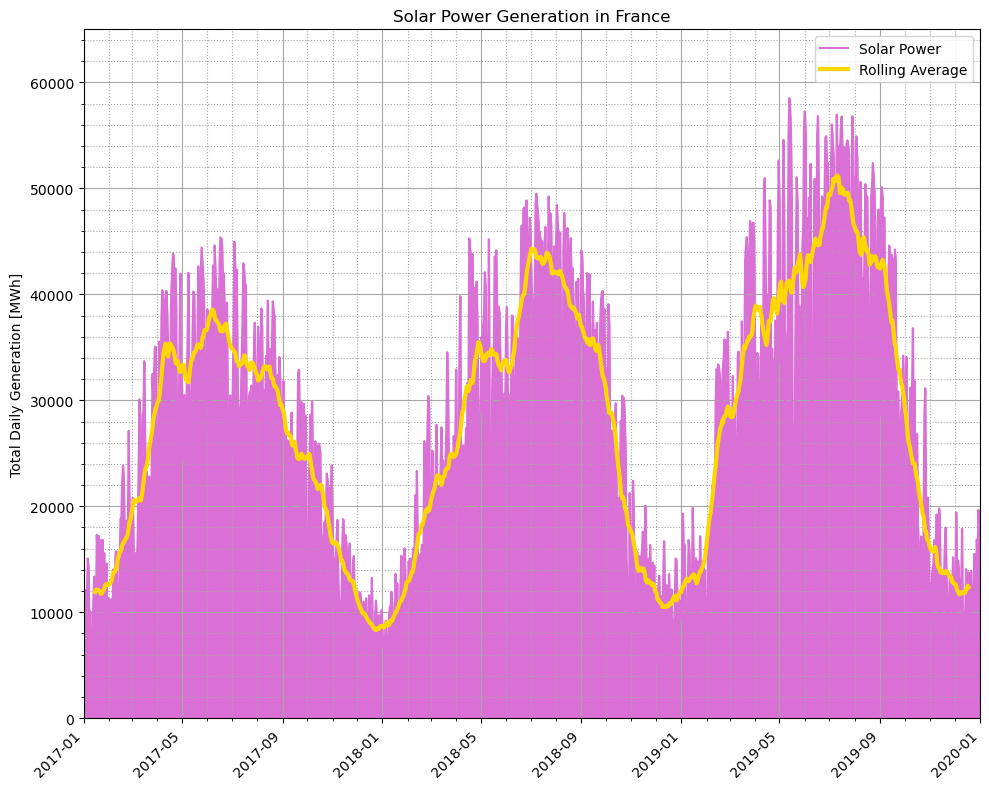

In [14]:
FRGen = pd.concat([FRGen2017["Wind [MWh]"], FRGen2018["Wind [MWh]"], FRGen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
FRGen["PSH [MWh]"] = pd.concat([FRGen2017["PSH [MWh]"], FRGen2018["PSH [MWh]"], FRGen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
FRGen["Hydro [MWh]"] = pd.concat([FRGen2017["Hydro [MWh]"], FRGen2018["Hydro [MWh]"], FRGen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
FRGen["Nuclear [MWh]"] = pd.concat([FRGen2017["Nuclear [MWh]"], FRGen2018["Nuclear [MWh]"], FRGen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
FRGen["Gas [MWh]"] = pd.concat([FRGen2017["Gas [MWh]"], FRGen2018["Gas [MWh]"], FRGen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
FRGen["Oil [MWh]"] = pd.concat([FRGen2017["Oil [MWh]"], FRGen2018["Oil [MWh]"], FRGen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
FRGen["Coal [MWh]"] = pd.concat([FRGen2017["Coal [MWh]"], FRGen2018["Coal [MWh]"], FRGen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
FRGen["Biomass [MWh]"] = pd.concat([FRGen2017["Biomass [MWh]"], FRGen2018["Biomass [MWh]"], FRGen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
FRGen["Solar [MWh]"] = pd.concat([FRGen2017["Solar [MWh]"], FRGen2018["Solar [MWh]"], FRGen2019["Solar [MWh]"]], ignore_index=True).to_frame("Solar [MWh]")

FRGen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

FRGen = pd.DataFrame(FRGen)

FRGen = FRGen.reindex(columns=NewOrder)

print(FRGen.dtypes)


######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type:", )

plt.title(f"{a} Power Generation in France")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(FRGen["Date"], FRGen[f"{a} [MWh]"], color="orchid", label=f"{a} Power")
ax.plot(FRGen["Date"], FRGen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
plt.fill_between(FRGen["Date"], FRGen[f"{a} [MWh]"], color="orchid")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit: ", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(17167, 18262)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()